In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Assignment

For this lab, we're going to use everything we've learned so far and try to predict bike demand using linear models!

The data comes from this [page](https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset).

    1. Download the dataset. 
    
In fact, by doing so you'll get two datasets. One is *daily* bike demand, and the other is *hourly* bike demand.
The daily dataset has fewer records (731) and might be a bit simpler to work with if you're just getting started.
If you want to have a bit more fun, go for the hourly dataset (17379 records).

Pick the one you want! 

    2. Read carefully through the documentation for the dataset. 

The download will also include a *readme* with good information about the dataset and descriptions for all the columns in it. The target we're going to try to model is the column *cnt*. 

You are forbidden to use the columns *casual* and *registered*. Why do you think that is?

    3. Conduct some initial EDA.

Get to know the data by e.g. doing some initial plots and some statistics in order to try to understand what you're dealing with. 

While doing this, also think carefully about what features you'd think are relevant to what we're trying to predict. 

Which feature(s) do you have reasons to believe might be the individually most reliable one(s) to predict the demand?

    4. Clean data

If warranted, start cleaning data.

    5. Model

Pick the features you think or have reasons to believe are relevant. Then, train a linear model and evaluate it. Does it perform well?

In this step, you are of course allowed to train many different models (all with different features). 

Can you find a particular combination of features that seem to work best?



In [69]:
#1
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.metrics import mean_squared_error

bike_df = pd.read_csv("../data/bike/hour.csv")


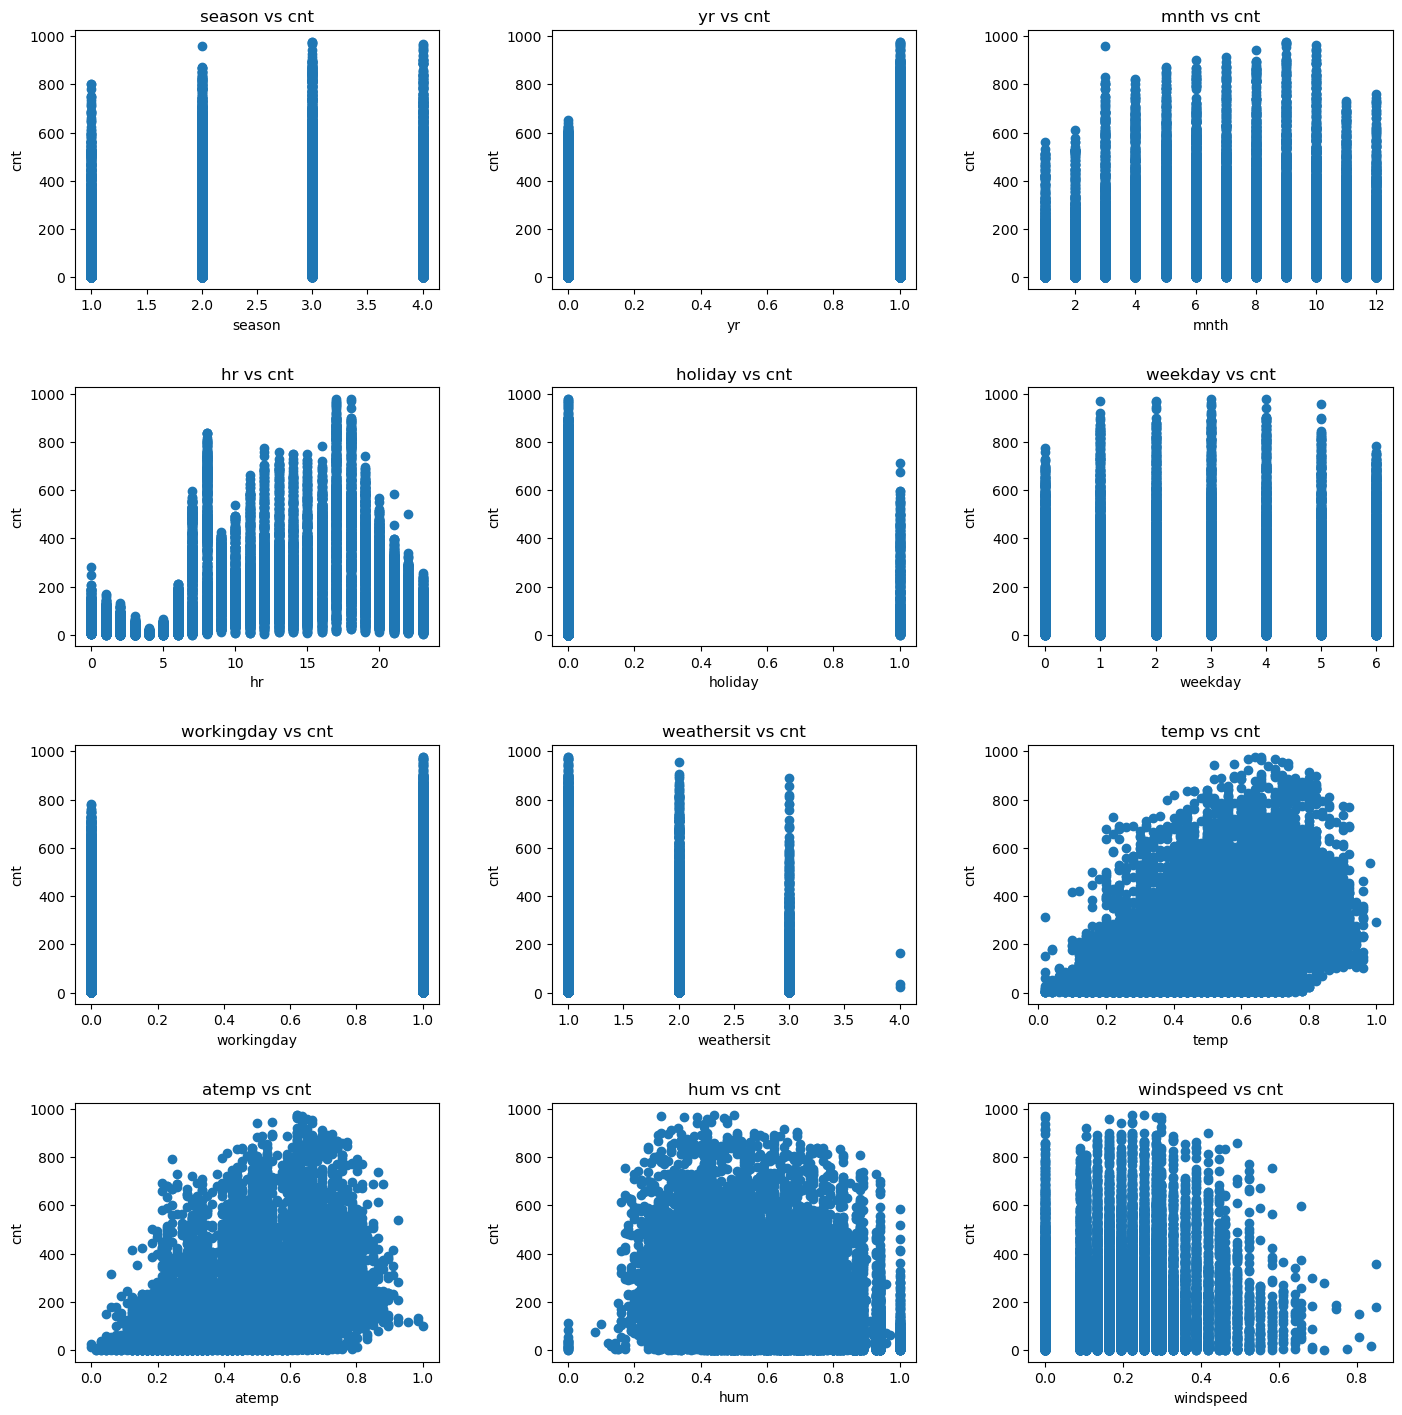

In [70]:
#3
new_bike_df = bike_df[["season", "yr", "mnth", "hr", "holiday", "weekday",
                       "workingday", "weathersit", "temp", "atemp", "hum", "windspeed", "cnt"]].copy()

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))  
fig.tight_layout(pad=5.0) 

for i, column in enumerate(new_bike_df.columns[:-1]): 
    row = i // 3 
    col = i % 3   
    axes[row, col].scatter(new_bike_df[column], new_bike_df["cnt"])  
    axes[row, col].set_title(f"{column} vs cnt")  
    axes[row, col].set_xlabel(column)  
    axes[row, col].set_ylabel("cnt")   

for i in range(len(new_bike_df.columns[:-1]), 4 * 3):
    fig.delaxes(axes.flatten()[i])

plt.show()

In [71]:

season_months = new_bike_df.groupby("season")["mnth"].unique()
season_months_dict = season_months.to_dict()
for season, months in season_months_dict.items():
    print(f"Säsong {season}: Månader {months}")

Säsong 1: Månader [ 1  2  3 12]
Säsong 2: Månader [3 4 5 6]
Säsong 3: Månader [6 7 8 9]
Säsong 4: Månader [ 9 10 11 12]


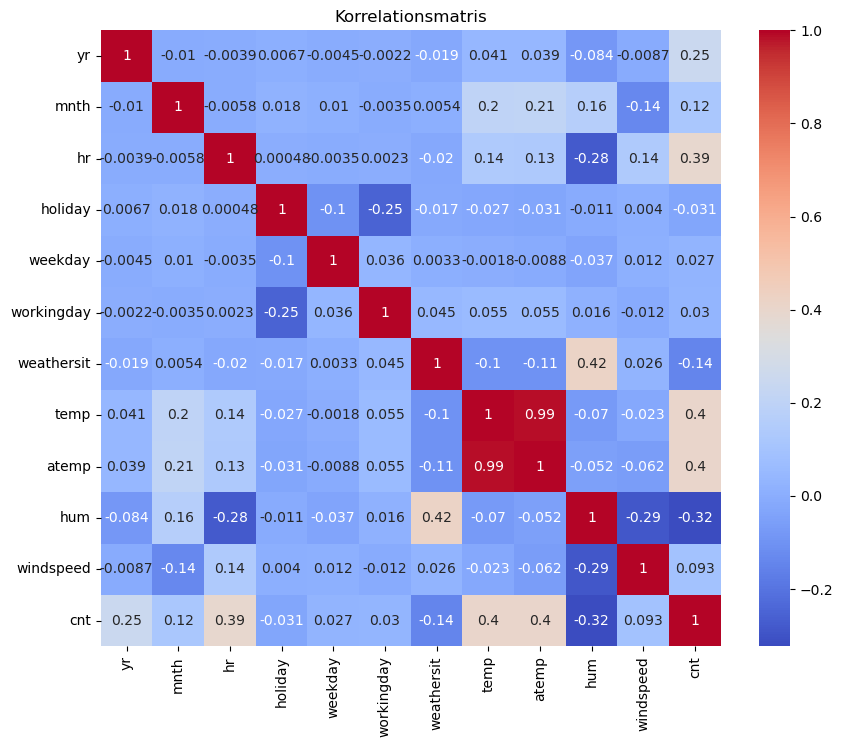

In [88]:
#4
clean_bike_df = new_bike_df[["yr", "mnth", "hr", "holiday", "weekday",
                       "workingday", "weathersit", "temp", "atemp", "hum", "windspeed", "cnt"]].copy()

correlation_matrix = clean_bike_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Korrelationsmatris")
plt.show()

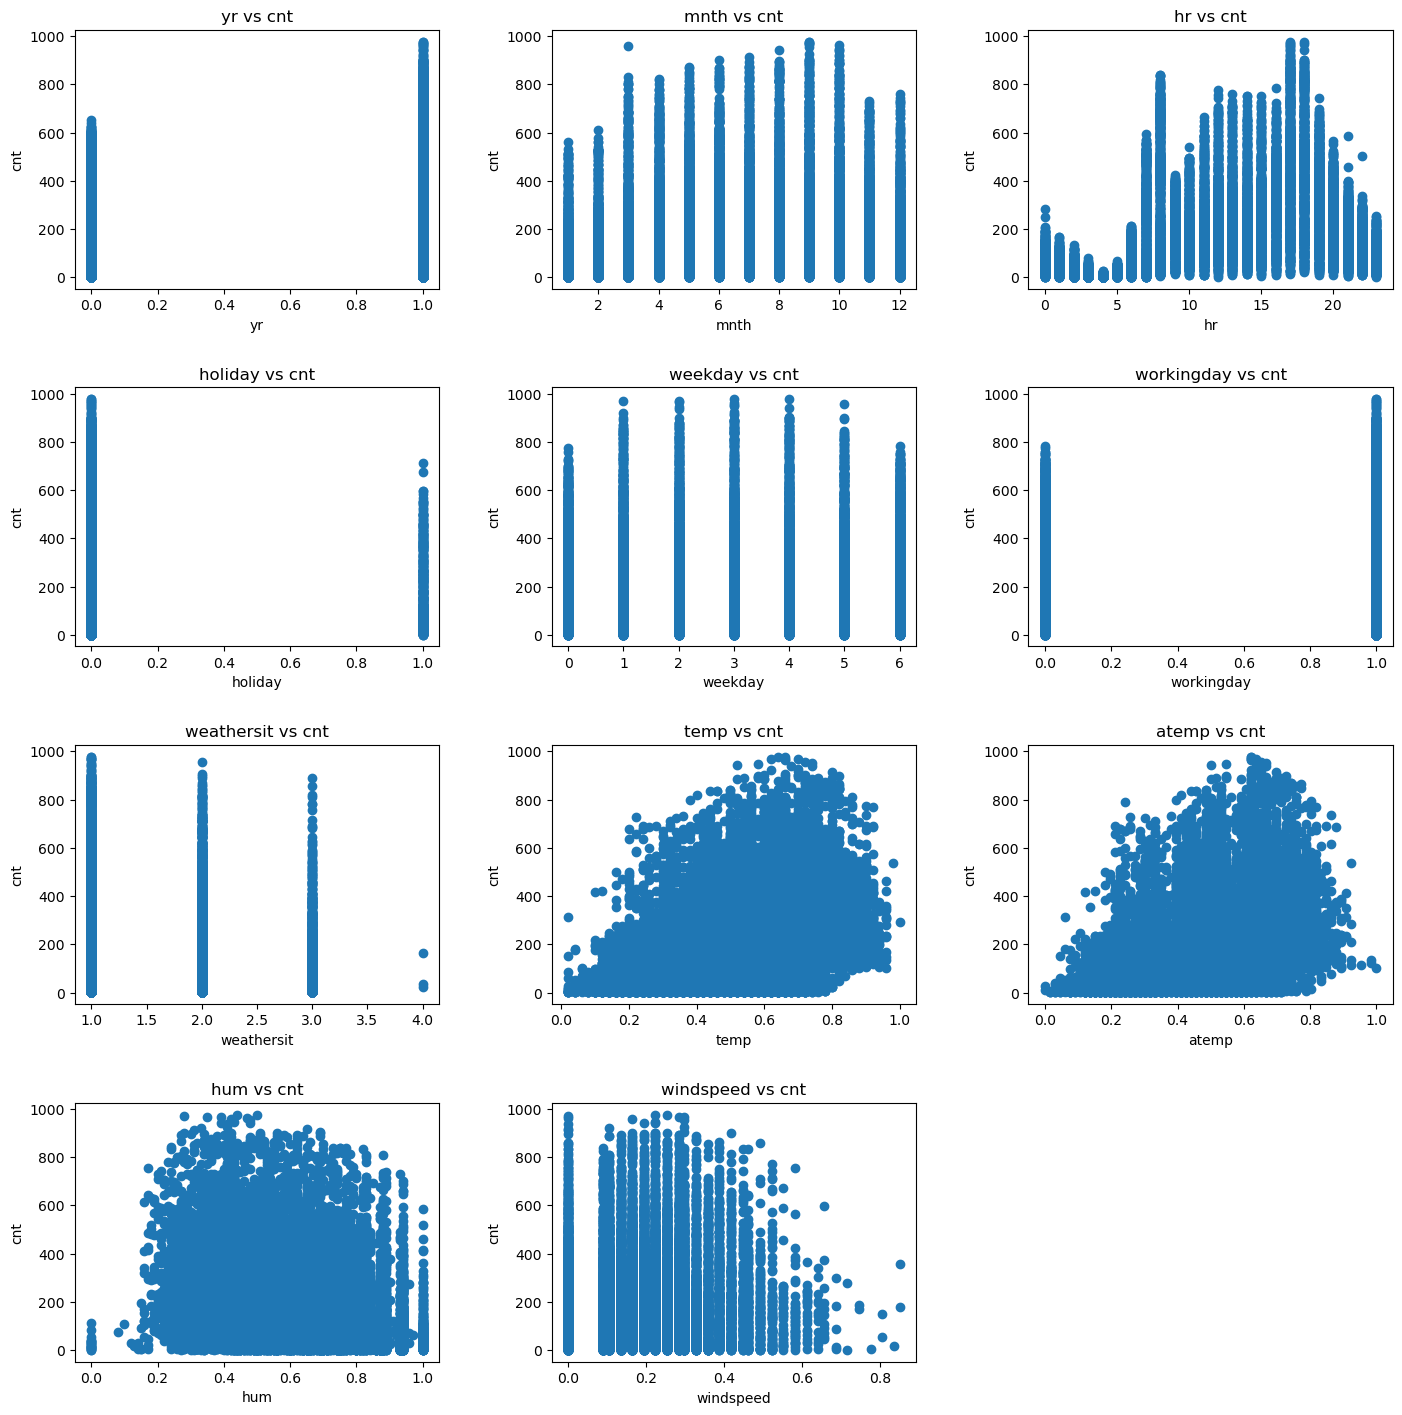

In [89]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))  
fig.tight_layout(pad=5.0) 

for i, column in enumerate(clean_bike_df.columns[:-1]): 
    row = i // 3 
    col = i % 3   
    axes[row, col].scatter(clean_bike_df[column], clean_bike_df["cnt"])  
    axes[row, col].set_title(f"{column} vs cnt")  
    axes[row, col].set_xlabel(column)  
    axes[row, col].set_ylabel("cnt")   

for i in range(len(clean_bike_df.columns[:-1]), 4 * 3):
    fig.delaxes(axes.flatten()[i])

plt.show()

Train:
MSE: 20106.630795654353
Test:
MSE: 20816.839363523624


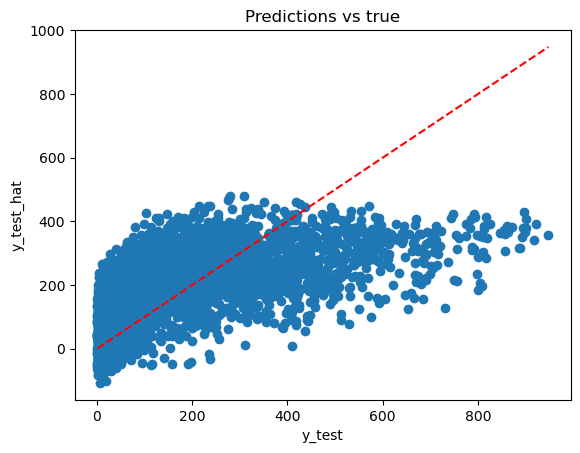

In [100]:
#5
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
multiple_linear_regression_model = LinearRegression()

X, y = clean_bike_df.drop(columns=["cnt"]).values, clean_bike_df["cnt"].values
y = y.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22) 
multiple_linear_regression_model.fit(X_train, y_train);

y_train_hat = multiple_linear_regression_model.predict(X_train)
y_test_hat = multiple_linear_regression_model.predict(X_test)

print('Train:')
print(f'MSE: {mean_squared_error(y_train, y_train_hat)}')

print('Test:')
print(f'MSE: {mean_squared_error(y_test, y_test_hat)}')

plt.scatter(y_test, y_test_hat);
plt.xlabel('y_test')
plt.ylabel('y_test_hat')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Predictions vs true")
plt.show()

Train:
MSE: 20129.26265693026
Test:
MSE: 20799.415947952948


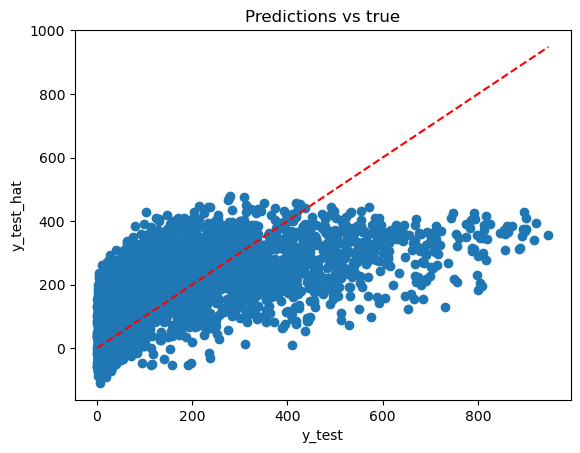

In [105]:

X, y = clean_bike_df.drop(columns=["cnt", "workingday", "weekday"]).values, clean_bike_df["cnt"].values
y = y.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22) 
multiple_linear_regression_model.fit(X_train, y_train);

y_train_hat = multiple_linear_regression_model.predict(X_train)
y_test_hat = multiple_linear_regression_model.predict(X_test)

print('Train:')
print(f'MSE: {mean_squared_error(y_train, y_train_hat)}')

print('Test:')
print(f'MSE: {mean_squared_error(y_test, y_test_hat)}')

plt.scatter(y_test, y_test_hat);
plt.xlabel('y_test')
plt.ylabel('y_test_hat')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Predictions vs true")
plt.show()